# <center> DATA 558 Homework 4 </center>
<center> Cathy Jia </center>
<center> Due May 3, 2019 by 11:59pm </center>

In [1]:
# Display all of the results.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

<div style="float: left">
    <img src="DATA558 HW4 P1.PNG" width="600"/>
    <img src="DATA558 HW4 P2.PNG" width="600"/>
    <img src="DATA558 HW4 P3.PNG" width="600"/>
    <img src="DATA558 HW4 P4.PNG" width="600"/>
    <img src="DATA558 HW4 P5.PNG" width="600"/>
</div>

# Exercise 2
**In this problem you will generate simulated data and then perform PCA on the data. For this purpose, you will write and then use *your own power iteration algorithm*. The Power Iteration algorithm returns the top pair of eigenvalue $\lambda$ and eigenvector $v$ of a matrix $A$.**

Note that “first two principal component score vectors” refers to the results from projecting the original data to a two-dimensional space with PCA.

### (a)
**Generate a simulated data set with 30 observations in each of three classes (i.e. 90 observations total), and 60 features. Hint: There are a number of functions in numpy that you can use to generate data. One example is the `numpy.random.normal()` function; `numpy.random.uniform()` is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.**

In [2]:
import numpy as np

np.random.seed(0)
x_train = np.random.normal(loc=0, scale=1, size=(90,60))
x_train[30:60,:] += 2
x_train[60:90,:] -= 2

y_train = np.ones([90,])
y_train[30:60,] = 2
y_train[60:90,] = 3

### (b)
**Write *your own power iteration algorithm*. Run it on the 90 observations to compute the first principal component. After performing the appropriate projection (see Lab #4), run it on the 90 observations now to compute the second principal component. Plot the first two principal component score vectors. Compare your results to the ones obtained with scikit-learn’s PCA algorithm. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then you’re done. If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes.**

In [3]:
def powerItr(A, max_iter=10000):
    """ Power Iteration ALgorithm """
    n, d = A.shape
    v = np.random.normal(size=(d,))
    v /= np.linalg.norm(v)
    lamb = v.T.dot(A.dot(v))
    k = 0
    # iterate for k = 0, ..., max_iter-1
    while k < max_iter:
        z = A.dot(v) # update z
        v = z / np.linalg.norm(z) # update top eigenvector
        lamb = v.T.dot(A.dot(v)) # update top eigenvalue
        k += 1
    return lamb, v

In [4]:
def mu(A):
    """ Mean Point """
    return np.mean(A, axis=0)

def covariance(A):
    """ Covariance Matrix"""
    n, d = A.shape
    mu_x = mu(A)
    z = A - mu_x[np.newaxis, :]
    cov = z.T.dot(z) / n
    return cov

In [5]:
n, d = x_train.shape

# The first principal component
cov = covariance(x_train)
lamb1, v1 = powerItr(cov)

# The k-th principal component vector maximize the variance of projection of x
x_project = x_train - x_train.dot(v1.reshape(d,1)).dot(v1.reshape(d,1).T)
cov = covariance(x_project)
lamb2, v2 = powerItr(cov)

print("Eigenvalue = %f\nThe first principal component:\n" % lamb1,v1)
print("\nEigenvalue = %f\nThe second principal component:\n" % lamb2,v2)

Eigenvalue = 158.261651
The first principal component:
 [0.1297775  0.1191286  0.12845199 0.13612468 0.13721485 0.12203568
 0.11837849 0.13824703 0.11801335 0.13929057 0.12651902 0.1269919
 0.11887687 0.12844037 0.12214777 0.14078031 0.1222468  0.1399122
 0.13038394 0.11598612 0.12020604 0.12869044 0.14948367 0.12707938
 0.12508135 0.11570237 0.12163758 0.14138264 0.11915887 0.14456968
 0.12906176 0.12484713 0.12787161 0.13177457 0.12913919 0.13079662
 0.13351546 0.12936292 0.11734001 0.1361329  0.1222923  0.12862486
 0.10589909 0.13299072 0.13165329 0.13251305 0.12476089 0.12379886
 0.13125639 0.13235677 0.14323789 0.1337259  0.13161948 0.1324931
 0.1359337  0.11997453 0.13811305 0.12975282 0.12912649 0.1288156 ]

Eigenvalue = 2.860525
The second principal component:
 [-0.15794762 -0.04313137  0.00830844  0.0187132   0.03521939  0.15733314
 -0.18909466  0.17316044  0.28985049  0.08006189  0.06391638  0.00967284
  0.13361515  0.0253934   0.0682962   0.07952053  0.01212931 -0.08650576
 

In [6]:
# Plot the first two principal component score vectors
import matplotlib.pyplot as plt

center = x_train - mu(x_train)
score = center.dot(np.array([v1,v2]).T)

fig, ax = plt.subplots(figsize=(8,5))
colors = {1:'red', 2:'green', 3:'blue'}
for c in colors:
    idx = np.where(y_train == c)
    plot = ax.scatter(score[idx,0], score[idx,1], c=colors[c], label=c, s=50, alpha=.5)
plot = ax.legend()
plot = plt.xlim(-25, 25)
plot = plt.ylim(-5, 5)
plot = plt.xlabel("1st Principal Component", fontsize=12)
plot = plt.ylabel("2nd Principal Component", fontsize=12)
plot = plt.title("First 2 Principal Component Score", fontsize=14)
plt.show()

<Figure size 800x500 with 1 Axes>

In [7]:
# Use PCA algorithm from sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components=60)
pca = pca.fit(x_train)
print("Eigenvalue = %f\nThe first principal component:\n" % pca.explained_variance_[0],pca.components_[0])
print("\nEigenvalue = %f\nThe second principal component:\n" % pca.explained_variance_[1],pca.components_[1])

Eigenvalue = 160.039872
The first principal component:
 [0.1297775  0.1191286  0.12845199 0.13612468 0.13721485 0.12203568
 0.11837849 0.13824703 0.11801335 0.13929057 0.12651902 0.1269919
 0.11887687 0.12844037 0.12214777 0.14078031 0.1222468  0.1399122
 0.13038394 0.11598612 0.12020604 0.12869044 0.14948367 0.12707938
 0.12508135 0.11570237 0.12163758 0.14138264 0.11915887 0.14456968
 0.12906176 0.12484713 0.12787161 0.13177457 0.12913919 0.13079662
 0.13351546 0.12936292 0.11734001 0.1361329  0.1222923  0.12862486
 0.10589909 0.13299072 0.13165329 0.13251305 0.12476089 0.12379886
 0.13125639 0.13235677 0.14323789 0.1337259  0.13161948 0.1324931
 0.1359337  0.11997453 0.13811305 0.12975282 0.12912649 0.1288156 ]

Eigenvalue = 2.892666
The second principal component:
 [-0.15794762 -0.04313137  0.00830844  0.0187132   0.03521939  0.15733314
 -0.18909466  0.17316044  0.28985049  0.08006189  0.06391638  0.00967284
  0.13361515  0.0253934   0.0682962   0.07952053  0.01212931 -0.08650576
 

The first two principal components computed by my own power iteration algorithm and PCA algorithm from sklearn are the same. The eigenvalues are very closed.

### (c)
**(Bonus) Note that the Power Iteration algorithm solves the equation $Av = \lambda v$, that is $min_v \mid\mid Av - \lambda v\mid\mid_2$. What other stopping criterion than the maximum number of iterations does it suggest for your own power iteration algorithm?**

# Exercise 3: Data Competition Project
### (a)
**Pick two classes of your choice from the dataset.**

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import PCA

# Load data
x_train = np.load('train_features.npy')
y_train = np.load('train_labels.npy')
x_test = np.load('val_features.npy')
y_test = np.load('val_labels.npy')
x_predict = np.load('test_features.npy')

# Original data
xtrain = x_train
ytrain = y_train
xtest = x_test
ytest = y_test

# Subset of data
idx_train = np.array([np.where(y_train==0),np.where(y_train==1)]).reshape(-1)
x_train = x_train[idx_train]
y_train = y_train[idx_train]
idx_test = np.array([np.where(y_test==0),np.where(y_test==1)]).reshape(-1)
x_test = x_test[idx_test]
y_test = y_test[idx_test]

# Standardize data
# Change label to +/- 1
xtrain = preprocessing.scale(xtrain).T
x_train = preprocessing.scale(x_train).T
xtest = preprocessing.scale(xtest).T
x_test = preprocessing.scale(x_test).T
x_predict = preprocessing.scale(x_predict).T
ytrain = ytrain.T
ytrain[ytrain!=1] = -1
y_train = y_train.T
y_train[y_train!=1] = -1
ytest = ytest.T
ytest[ytest!=1] = -1
y_test = y_test.T
y_test[y_test!=1] = -1

(200, 4096)

### (b)
**Run PCA on this subset of the data using Scikit-Learn and project the data down to two dimensions.**

In [17]:
# PCA
pca = PCA(svd_solver='full')
pca = pca.fit(x_train.T)
print("The first principle component:\n", pca.components_[0])
print("\nThe second principle component:\n", pca.components_[1])

# Project train data down to two dimensions
center = x_train - mu(x_train)
x_train_2 = np.array([pca.components_[0],pca.components_[1]]).dot(center)

# Project test data down to two dimensions
center = x_test - mu(x_test)
x_test_2 = np.array([pca.components_[0],pca.components_[1]]).dot(center)

The first principle component:
 [ 0.0035545   0.03105442  0.01705239 ...  0.03469627 -0.01184825
 -0.01973408]

The second principle component:
 [-0.00983149  0.00151867  0.00356954 ...  0.01426483  0.02464708
  0.00904468]


### (c)
**You will be training an $l_2$-regularized logistic regression classifier. Find the value of the regularization parameter $\lambda$ using Scikit-Learn with 5-fold cross-validation.**

In [18]:
# Find optimal lambda by 5-fold cross-validation
n = x_train_2.shape[1]
clf = LogisticRegressionCV(cv=5, penalty='l2', fit_intercept=False, tol=10e-8, max_iter=1000)
fit = clf.fit(x_train_2.T, y_train)
lamb_opt = 1/(2*n*clf.C_[0])
print("The optimal value of lambda is", lamb_opt)

The optimal value of lambda is 5.0


### (d)
**Train a classifier using $l_2$-regularized logistic regression on the training set using *your own fast gradient algorithm*.**

In [19]:
# Define functions
def computegrad(X, Y, beta, lamb):
    n = X.shape[1]
    p = np.exp(np.multiply(-Y.T,X.T.dot(beta)))/(1+np.exp(np.multiply(-Y.T,X.T.dot(beta))))
    p = np.diag(p)
    return -1/n*X.dot(p).dot(Y)+2*lamb*beta

def obj(X, Y, beta, lamb):
    n = X.shape[1]
    return 1/n*np.sum(np.log(1+np.exp(np.multiply(-Y.T,X.T.dot(beta))))) + lamb*np.linalg.norm(beta)**2

def backtracking(X, Y, beta, grad, init_eta, lamb, max_itr=10):
    norm_grad = np.linalg.norm(grad)
    eta = init_eta
    itr = 0
    while itr < max_itr:     
        if obj(X, Y, beta-eta*grad, lamb) <= (obj(X, Y, beta, lamb)-0.5*eta*norm_grad**2):
            break
        else:
            eta = 0.8 * eta
        itr += 1
    return eta

def initEta(X, lamb):
    n = X.shape[1]
    return 1/(max(np.linalg.eigvals(1/n*X.dot(X.T)))+lamb)

def fastgradalgo(X, Y, init, lamb, eps, max_iter=1000):
    beta = init
    theta = init
    # initial step-size value
    eta = initEta(X, lamb)
    grad = computegrad(X, Y, theta, lamb)
    vals = [beta]
    t = 0
    # The stopping criterion is norm(grad) <= eps
    while (np.linalg.norm(grad) > eps and t < max_iter):
        eta = backtracking(X, Y, beta, grad, eta, lamb)
        temp = beta
        beta = theta - eta * grad
        theta = beta + t/(t+3)*(beta-temp)
        vals.append(beta)
        grad = computegrad(X, Y, theta, lamb)
        t += 1
    return np.array(vals)

def obj_plot(X1, Y1, X2, Y2, vals, lamb, dim):
    n = vals.shape[0] # number of iterations
    obj1 = np.zeros(n) # train
    obj2 = np.zeros(n) # test
    for i in range(n):
        obj1[i] = obj(X1, Y1, vals[i],lamb)
        obj2[i] = obj(X2, Y2, vals[i],lamb)
    plt.figure()
    plt.plot(obj1, label='Train Data')
    plt.plot(obj2, label='Test Data')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.title('Objective Value over Iterations\nDimension = %d' %dim, fontsize=13)
    plt.legend()
    plt.show()
        
    return

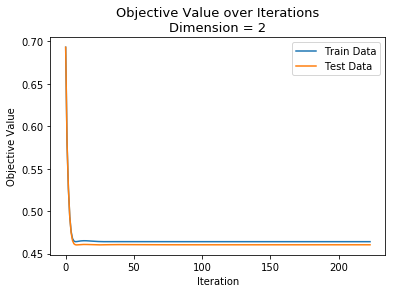

In [20]:
# Train on the training set
vals_fg = fastgradalgo(x_train_2, y_train, init=np.zeros([x_train_2.shape[0],]), lamb=lamb_opt, eps=0.0001)
# Plot objective values over iterations
obj_plot(x_train_2, y_train, x_test_2, y_test, vals_fg, lamb_opt, 2)

### (e)
**Repeat steps (b)-(d), trying all powers of two up to the number of features in the dataset.**

In [21]:
def mu(A):
    return np.mean(A, axis=0)

def compute(X1, Y1, X2, N):
    # PCA
    pca = PCA(svd_solver='full')
    pca = pca.fit(X1.T)
    pc = np.array([pca.components_[0]])
    for i in range(1,N):
        pc = np.concatenate((pc,np.array([pca.components_[i]])), axis=0)
        
    # Project data down to N dimensions
    center1 = X1 - mu(X1)
    x_train_ = pc.dot(center1)
    center2 = X2 - mu(X2)
    x_test_ = pc.dot(center2)

    # Find optimal lambda by 5-fold cross-validation
    n = x_train_.shape[1]
    clf = LogisticRegressionCV(cv=5, penalty='l2', fit_intercept=False, tol=10e-8, max_iter=1000)
    fit = clf.fit(x_train_.T, Y1)
    lamb_opt = 1/(2*n*clf.C_[0])
    
    # Train on the training set
    vals_fg = fastgradalgo(x_train_, Y1, init=np.zeros([x_train_.shape[0],]), lamb=lamb_opt, eps=0.0001)

    return [x_train_, x_test_, vals_fg, pc, lamb_opt]

According to `sklearn` documentation, default `n_components` is defined as `min(n_samples, n_features)` (See link: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). So the maximum dimension we are able to reduce to is 1000. In this case, we should do all powers of 2 up to 512. Otherwise, the pca function will give an error message indicating that the maximum number of components is min(n_samples, n_features)-1 which is 999. 

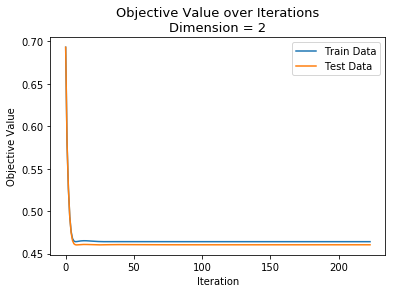

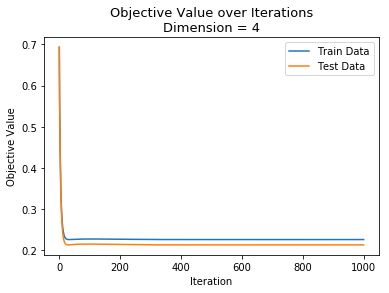

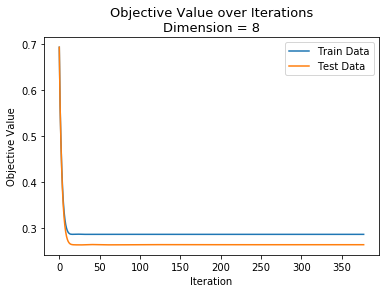

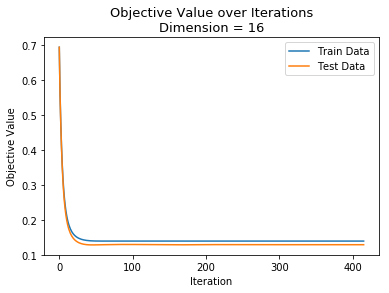

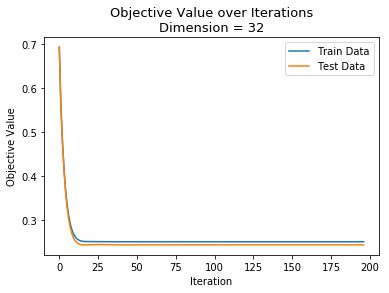

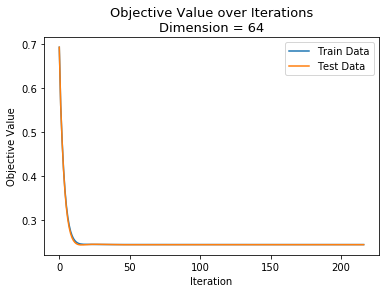

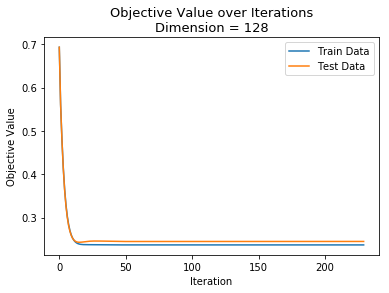

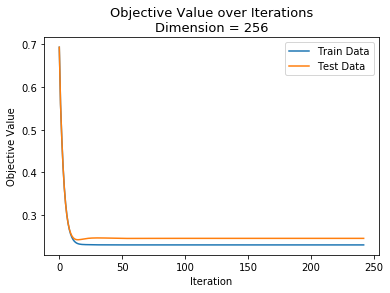

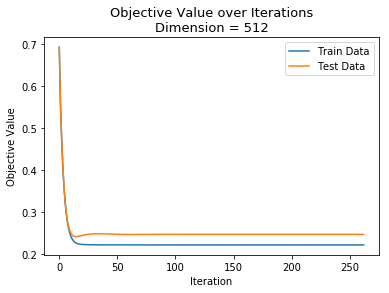

In [23]:
# Try 2, 4, 8, 16, 32, 64, 128, 256, 512

lst = [2, 4, 8, 16, 32, 64, 128, 256, 512]
for dim in lst:
    x_train_, x_test_, vals_fg, pc, lamb_opt = compute(x_train, y_train, x_test, dim)
    # Plot objective values over iterations
    obj_plot(x_train_, y_train, x_test_, y_test, vals_fg, lamb_opt, dim)

In [22]:
# Try: 1024, 2048, 4096

lst = [1024, 2048, 4096]
for dim in lst:
    x_train_, x_test_, vals_fg, pc, lamb_opt = compute(x_train, y_train, x_test, dim)

IndexError: index 1000 is out of bounds for axis 0 with size 1000

### (f)
**Plot, with different colors, the *misclassification error* on the training set and on the test set vs. the dimension of the projection. Note that to obtain the performance on the test set you will need to submit to Kaggle, and you can only submit three times per day. If you only have enough time for three submissions, submit your predictions for dimensions 2, 16, and 128.**

In [28]:
def predict(X, beta):
    pred = 1/(1+np.exp(-X.T.dot(beta))) > 0.5 # adjust threshold
    pred = pred.astype(int) # True 1 False 0
    return pred.T

def compME(X, Y, beta):
    pred = predict(X, beta) # adjust threshold
    err = np.mean(pred != Y)
    return err

def ME_plot(me_train, me_test, dims):#, me_test, dims):
    plt.figure()
    plt.plot(dims, me_train, label='Train Data')
    plt.plot(dims, me_test, label='Test Data')
    plt.xlabel('Dimension')
    plt.ylabel('Misclassification Error')
    plt.title('Misclassification Error', fontsize=13)
    plt.legend()
    plt.show()
    return

In [ ]:
train = np.load('train_labels.npy').T
test = np.load('val_labels.npy').T

lst = [2, 4, 8, 16, 32, 64, 128, 256, 512]
me_train = []
me_test = []
betas = {}
for dim in lst:
    x_train_, x_test_, vals_fg, pc, lamb_opt = compute(xtrain, ytrain, xtest, dim)
    beta_T = vals_fg[vals_fg.shape[0]-1]
    betas[dim] = beta_T # save beta_T
    me = compME(x_train_, train, beta_T)
    me_train.append(me)
    me = compME(x_test_, test, beta_T)
    me_test.append(me)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,

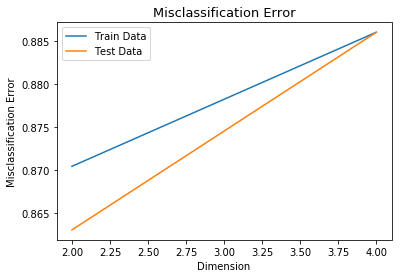

In [33]:
ME_plot(me_train, me_test, lst)

**Prediction for Kaggle Competition**

In [34]:
# Choose number of dimensions
dim = 2
beta_T = betas[dim]
print('Train set accuracy:', 1-me_train[lst.index(dim)])
print('Test set accuracy:', 1-me_test[lst.index(dim)])

Train set accuracy: 0.12960000000000005
Test set accuracy: 0.137


In [ ]:
# Prediction for class 1, rest for class 0
center = x_predict - mu(x_predict)
x_predict_ = pc.dot(center)
y_predict = np.ones([x_predict_.shape[1],])
p = 1/(1+np.exp(-x_predict_.T.dot(beta_T1)))
y_predict[p<=0.5] = 0
y_predict = y_predict.astype(int)
y_predict

In [ ]:
# Write into csv file
df = pd.read_csv('sample_submission.csv')
df['Category'] = y_predict
df.to_csv('submission.csv',index=False)

In [ ]:
# Prediction for class 1, rest for class 0
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV
from sklearn.decomposition import PCA

# Load data
x_train = np.load('train_features.npy')
y_train = np.load('train_labels.npy')
x_test = np.load('val_features.npy')
y_test = np.load('val_labels.npy')
x_predict = np.load('test_features.npy')

# Standardize data
# Change label to +/- 1
x_train = preprocessing.scale(x_train).T
x_test = preprocessing.scale(x_test).T
x_predict = preprocessing.scale(x_predict).T
y_train = y_train.T
y_test = y_test.T

from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=10)  
classifier.fit(x_train.T, y_train)
classifier.score(x_test.T, y_test)

In [ ]:
y_pred = classifier.predict(x_predict.T)
y_pred

In [ ]:
# Write into csv file
df = pd.read_csv('sample_submission.csv')
df['Category'] = y_predict1
df.to_csv('submission.csv',index=False)

# Exercise 4
**In this exercise, you will compute the gradients of several loss functions. Notation: for an example-label pair $(x, y)$, the prediction is $x^T\beta$.**
- $l(y,x^T\beta) = (y-x^T\beta)^4$
- $l(y,x^T\beta) = yx^T\beta-exp(x^T\beta)$
- $l(y,x^T\beta) = (max(0,1-yx^T\beta))^2$